In [1]:
import pandas as pd
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
pd.set_option("display.max_rows", 250)

In [ ]:
df_meetings = pd.read_csv("./data/gold/panel_data_meetings_Ym_v020701.csv")
del df_meetings["Y-w"]
df_meetings.set_index(["member_id", "Y-m"], inplace=True)


df_meps = pd.read_csv("./data/gold/panel_data_meps_Ym_v020702.csv")
del df_meps["Y-w"]
df_meps.set_index(["member_id", "Y-m"], inplace=True)


df_questions = pd.read_csv("./data/gold/panel_data_questions_Ym_v020703.csv")
del df_questions["Y-w"]
df_questions.rename(columns={"creator": "member_id"}, inplace=True)
df_questions.set_index(["member_id", "Y-m"], inplace=True)

# Add prefixes to columns
df_questions_prefixed = df_questions.add_prefix("questions_")
df_meps_prefixed = df_meps.add_prefix("meps_")
df_meetings_prefixed = df_meetings.add_prefix("meetings_")

for df_ in [df_questions_prefixed, df_meps_prefixed, df_meetings_prefixed]:
    df_.reset_index(inplace=True)
    if not pd.api.types.is_datetime64_any_dtype(df_["Y-m"]):
        df_["Y-m"] = pd.to_datetime(df_["Y-m"], format="%Y-%m")
    df_.set_index(["member_id", "Y-m"], inplace=True)

# Join all dataframes

df = df_meps_prefixed.join(
    df_questions_prefixed, on=["member_id", "Y-m"], how="left"
).join(df_meetings_prefixed, on=["member_id", "Y-m"], how="left")


# fill na
df.fillna(0, inplace=True)

# log questions
for c in df.columns:
    if "questions_infered_topic" in c:
        df[f"log_{c}"] = np.log(df[c] + 1)

In [292]:
QUESTIONS_TOPICS_COLUMNS = [
    c for c in df.columns if "questions_infered_topic" in c
]

LOG_QUESTIONS_TOPICS_COLUMNS = [f"log_{c}" for c in QUESTIONS_TOPICS_COLUMNS]


In [319]:
MEETINGS_TOPICS_COLUMNS = [
    "meetings_l_agriculture",
    "meetings_l_economics_and_trade",
    "meetings_l_education",
    "meetings_l_environment_and_climate",
    "meetings_l_foreign_and_security_affairs",
    "meetings_l_health",
    "meetings_l_human_rights",
    "meetings_l_infrastructure_and_industry",
    "meetings_l_technology",
]

MEETINGS_MEMBER_CAPACITY_COLUMNS = [
    "meetings_member_capacity_Committee chair",
    "meetings_member_capacity_Delegation chair",
    "meetings_member_capacity_Member",
    "meetings_member_capacity_Rapporteur",
    "meetings_member_capacity_Rapporteur for opinion",
    "meetings_member_capacity_Shadow rapporteur",
    "meetings_member_capacity_Shadow rapporteur for opinion",
]

MEETINGS_CATEGORY_COLUMNS = [
    "meetings_l_category_Business",
    "meetings_l_category_NGOs",
    "meetings_l_category_Other",
    "meetings_l_budget_cat_lower",
    "meetings_l_budget_cat_middle",
    "meetings_l_budget_cat_upper",
    "meetings_l_days_since_registration_lower",
    "meetings_l_days_since_registration_middle",
    "meetings_l_days_since_registration_upper",
]

MEETINGS_HEAD_OFFICE_COLUMNS = [
    "meetings_l_head_office_country_AUSTRALIA",
    "meetings_l_head_office_country_AUSTRIA",
    "meetings_l_head_office_country_BARBADOS",
    "meetings_l_head_office_country_BELGIUM",
    "meetings_l_head_office_country_BRAZIL",
    "meetings_l_head_office_country_BULGARIA",
    "meetings_l_head_office_country_CANADA",
    "meetings_l_head_office_country_CHINA",
    "meetings_l_head_office_country_COLOMBIA",
    "meetings_l_head_office_country_COSTA RICA",
    "meetings_l_head_office_country_CROATIA",
    "meetings_l_head_office_country_CYPRUS",
    "meetings_l_head_office_country_CZECH REPUBLIC",
    "meetings_l_head_office_country_DENMARK",
    "meetings_l_head_office_country_ESTONIA",
    "meetings_l_head_office_country_FINLAND",
    "meetings_l_head_office_country_FRANCE",
    "meetings_l_head_office_country_GEORGIA",
    "meetings_l_head_office_country_GERMANY",
    "meetings_l_head_office_country_GHANA",
    "meetings_l_head_office_country_GREECE",
    "meetings_l_head_office_country_HUNGARY",
    "meetings_l_head_office_country_ICELAND",
    "meetings_l_head_office_country_INDIA",
    "meetings_l_head_office_country_IRELAND",
    "meetings_l_head_office_country_ISRAEL",
    "meetings_l_head_office_country_ITALY",
    "meetings_l_head_office_country_JAPAN",
    "meetings_l_head_office_country_KOREA, REPUBLIC OF",
    "meetings_l_head_office_country_KOSOVO",
    "meetings_l_head_office_country_LATVIA",
    "meetings_l_head_office_country_LIECHTENSTEIN",
    "meetings_l_head_office_country_LITHUANIA",
    "meetings_l_head_office_country_LUXEMBOURG",
    "meetings_l_head_office_country_MACAO",
    "meetings_l_head_office_country_MALAYSIA",
    "meetings_l_head_office_country_MALTA",
    "meetings_l_head_office_country_MEXICO",
    "meetings_l_head_office_country_MOLDOVA, REPUBLIC OF",
    "meetings_l_head_office_country_MOROCCO",
    "meetings_l_head_office_country_MYANMAR",
    "meetings_l_head_office_country_NETHERLANDS",
    "meetings_l_head_office_country_NEW ZEALAND",
    "meetings_l_head_office_country_NIGERIA",
    "meetings_l_head_office_country_NORWAY",
    "meetings_l_head_office_country_PAKISTAN",
    "meetings_l_head_office_country_PALESTINIAN OCCUPIED TERRITORY",
    "meetings_l_head_office_country_POLAND",
    "meetings_l_head_office_country_PORTUGAL",
    "meetings_l_head_office_country_QATAR",
    "meetings_l_head_office_country_REUNION",
    "meetings_l_head_office_country_ROMANIA",
    "meetings_l_head_office_country_RUSSIA, FEDERATION OF",
    "meetings_l_head_office_country_SERBIA",
    "meetings_l_head_office_country_SINGAPORE",
    "meetings_l_head_office_country_SLOVAKIA",
    "meetings_l_head_office_country_SLOVENIA",
    "meetings_l_head_office_country_SOUTH AFRICA",
    "meetings_l_head_office_country_SPAIN",
    "meetings_l_head_office_country_SWEDEN",
    "meetings_l_head_office_country_SWITZERLAND",
    "meetings_l_head_office_country_TAIWAN",
    "meetings_l_head_office_country_THAILAND",
    "meetings_l_head_office_country_TOGO",
    "meetings_l_head_office_country_TURKEY",
    "meetings_l_head_office_country_UKRAINE",
    "meetings_l_head_office_country_UNITED ARAB EMIRATES",
    "meetings_l_head_office_country_UNITED KINGDOM",
    "meetings_l_head_office_country_UNITED STATES",
    "meetings_l_head_office_country_VIETNAM",
]

In [ ]:
LOG_MEETINGS_TOPICS_COLUMNS = [f"log_{c}" for c in MEETINGS_TOPICS_COLUMNS]

LOG_MEETINGS_MEMBER_CAPACITY_COLUMNS = [
    f"log_{c}" for c in MEETINGS_MEMBER_CAPACITY_COLUMNS
]

LOG_MEETINGS_CATEGORY_COLUMNS = [f"log_{c}" for c in MEETINGS_CATEGORY_COLUMNS]

LOG_MEETINGS_HEAD_OFFICE_COLUMNS = [f"log_{c}" for c in MEETINGS_HEAD_OFFICE_COLUMNS]


for c in [
    *MEETINGS_TOPICS_COLUMNS,
    *MEETINGS_MEMBER_CAPACITY_COLUMNS,
    *MEETINGS_CATEGORY_COLUMNS,
    *MEETINGS_HEAD_OFFICE_COLUMNS,
]:
    df[f"log_{c}"] = np.log(df[c] + 1)

In [279]:
MEPS_POLITICAL_GROUP_COLUMNS = [
    "meps_POLITICAL_GROUP_5148.0",
    "meps_POLITICAL_GROUP_5151.0",
    "meps_POLITICAL_GROUP_5152.0",
    "meps_POLITICAL_GROUP_5153.0",
    "meps_POLITICAL_GROUP_5154.0",
    "meps_POLITICAL_GROUP_5155.0",
    "meps_POLITICAL_GROUP_5588.0",
    "meps_POLITICAL_GROUP_5704.0",
    "meps_POLITICAL_GROUP_6259.0",
    "meps_POLITICAL_GROUP_6561.0",
    "meps_POLITICAL_GROUP_7018.0",
    "meps_POLITICAL_GROUP_7028.0",
    "meps_POLITICAL_GROUP_7035.0",
    "meps_POLITICAL_GROUP_7036.0",
    "meps_POLITICAL_GROUP_7037.0",
    "meps_POLITICAL_GROUP_7038.0",
    "meps_POLITICAL_GROUP_7150.0",
    "meps_POLITICAL_GROUP_7151.0",
]

MEPS_COUNTRY_COLUMNS = [
    "meps_COUNTRY_AUT",
    "meps_COUNTRY_BEL",
    "meps_COUNTRY_BGR",
    "meps_COUNTRY_CYP",
    "meps_COUNTRY_CZE",
    "meps_COUNTRY_DEU",
    "meps_COUNTRY_DNK",
    "meps_COUNTRY_ESP",
    "meps_COUNTRY_EST",
    "meps_COUNTRY_FIN",
    "meps_COUNTRY_FRA",
    "meps_COUNTRY_GBR",
    "meps_COUNTRY_GRC",
    "meps_COUNTRY_HRV",
    "meps_COUNTRY_HUN",
    "meps_COUNTRY_IRL",
    "meps_COUNTRY_ITA",
    "meps_COUNTRY_LTU",
    "meps_COUNTRY_LUX",
    "meps_COUNTRY_LVA",
    "meps_COUNTRY_MLT",
    "meps_COUNTRY_NLD",
    "meps_COUNTRY_POL",
    "meps_COUNTRY_PRT",
    "meps_COUNTRY_ROU",
    "meps_COUNTRY_SVK",
    "meps_COUNTRY_SVN",
    "meps_COUNTRY_SWE",
]

MEPS_POSITIONS_COLUMNS = [
    "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR",
    # "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR_VICE",
    "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER",
    # "meps_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER_SUBSTITUTE",
    "meps_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR",
    # "meps_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR_VICE",
    "meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER",
    # "meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE",
    "meps_COMMITTEE_PARLIAMENTARY_SUB - CHAIR",
    # "meps_COMMITTEE_PARLIAMENTARY_SUB - CHAIR_VICE",
    "meps_COMMITTEE_PARLIAMENTARY_SUB - MEMBER",
    # "meps_COMMITTEE_PARLIAMENTARY_SUB - MEMBER_SUBSTITUTE",
    # "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - CHAIR",
    # "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - CHAIR_VICE",
    # "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - MEMBER",
    # "meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - MEMBER_SUBSTITUTE",
    # "meps_DELEGATION_JOINT_COMMITTEE - CHAIR",
    # "meps_DELEGATION_JOINT_COMMITTEE - CHAIR_VICE",
    # "meps_DELEGATION_JOINT_COMMITTEE - MEMBER",
    # "meps_DELEGATION_JOINT_COMMITTEE - MEMBER_SUBSTITUTE",
    "meps_DELEGATION_PARLIAMENTARY - CHAIR",
    # "meps_DELEGATION_PARLIAMENTARY - CHAIR_VICE",
    "meps_DELEGATION_PARLIAMENTARY - MEMBER",
    # "meps_DELEGATION_PARLIAMENTARY - MEMBER_SUBSTITUTE",
    # "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - CHAIR",
    # "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - CHAIR_VICE",
    # "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER",
    # "meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER_SUBSTITUTE",
    "meps_EU_INSTITUTION - PRESIDENT",
    # "meps_EU_INSTITUTION - PRESIDENT_VICE",
    "meps_EU_INSTITUTION - QUAESTOR",
    "meps_EU_POLITICAL_GROUP - CHAIR",
    # "meps_EU_POLITICAL_GROUP - CHAIR_CO",
    # "meps_EU_POLITICAL_GROUP - CHAIR_VICE",
    # "meps_EU_POLITICAL_GROUP - CHAIR_VICE_FIRST",
    "meps_EU_POLITICAL_GROUP - MEMBER_BUREAU",
    # "meps_EU_POLITICAL_GROUP - PRESIDENT_CO",
    "meps_EU_POLITICAL_GROUP - TREASURER",
    "meps_EU_POLITICAL_GROUP - TREASURER_CO",
    "meps_NATIONAL_CHAMBER - PRESIDENT_VICE",
    "meps_WORKING_GROUP - CHAIR",
    # "meps_WORKING_GROUP - CHAIR_CO",
    # "meps_WORKING_GROUP - CHAIR_VICE",
    "meps_WORKING_GROUP - MEMBER",
    "meps_WORKING_GROUP - MEMBER_BUREAU",
    # "meps_WORKING_GROUP - PRESIDENT_PARLIAMENT_STOA",
]

# Descritivas

## Total de questões e reuniões

<Axes: xlabel='Y-m'>

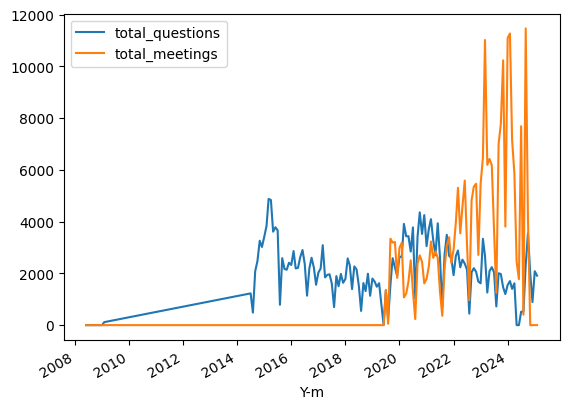

In [321]:
df_ = (
    df.reset_index()
    .groupby("Y-m")
    .agg(
        {
            "member_id": "count",
            **{
                c: "sum"
                for c in df.columns
                if "questions_infered_topic" in c
                or (
                    "meetings_l" in c
                    and (
                        "head_office" not in c
                        and "category" not in c
                        and "budget_cat" not in c
                        and "days_since_registration" not in c
                    )
                )
            },
        }
    )
    .sort_values("Y-m", ascending=False)
)

df_["total_questions"] = df_.apply(
    lambda row: sum(row[c] for c in df_.columns if "questions_infered_topic" in c),
    axis=1,
)
df_["total_meetings"] = df_.apply(
    lambda row: sum(row[c] for c in df_.columns if "meetings_l" in c), axis=1
)

df_[["total_questions", "total_meetings"]].plot()

Como há problemas na captação dos dados de reuniões antes de 2019-07  e 2024-11

Remover esses pontos fora do intervalo

In [322]:
df_filtered = df.loc[
    (df.index.get_level_values("Y-m") > "2019-07")
    & (df.index.get_level_values("Y-m") < "2024-11")
]

<Axes: xlabel='Y-m'>

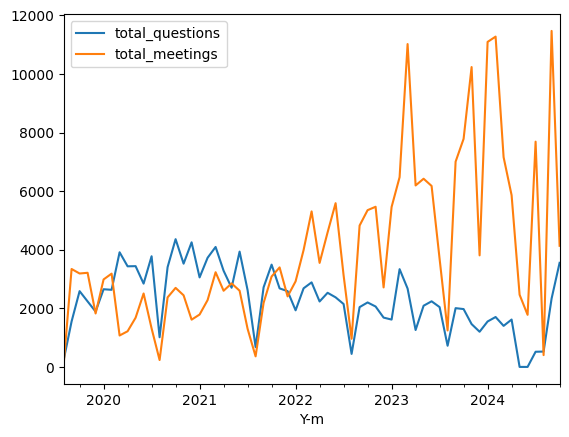

In [323]:
df_ = (
    df_filtered.reset_index()
    .groupby("Y-m")
    .agg(
        {
            "member_id": "count",
            **{
                c: "sum"
                for c in df.columns
                if "questions_infered_topic" in c
                or (
                    "meetings_l" in c
                    and (
                        "head_office" not in c
                        and "category" not in c
                        and "budget_cat" not in c
                        and "days_since_registration" not in c
                    )
                )
            },
        }
    )
    .sort_values("Y-m", ascending=False)
)

df_["total_questions"] = df_.apply(
    lambda row: sum(row[c] for c in df_.columns if "questions_infered_topic" in c),
    axis=1,
)
df_["total_meetings"] = df_.apply(
    lambda row: sum(row[c] for c in df_.columns if "meetings_l" in c), axis=1
)

df_[["total_questions", "total_meetings"]].plot()

# Testar diferentes modelos - do mais simples ao mais complexo

In [95]:
from linearmodels import PanelOLS

# Model 0

Y_c ~ L_c

In [99]:
model = PanelOLS(
    dependent=df_filtered["questions_infered_topic_technology"],
    exog=df_filtered[["meetings_l_technology"]],
    entity_effects=True,
    time_effects=True,
)
results = model.fit()
results.summary

Dep. Variable:,questions_infered_topic_technology,R-squared:,9.56e-06
Estimator:,PanelOLS,R-squared (Between):,-0.0022
No. Observations:,21182,R-squared (Within):,8.808e-05
Date:,"Wed, Jul 23 2025",R-squared (Overall):,-0.0008
Time:,20:13:13,Log-likelihood,-2.286e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.1913
Entities:,1109,P-value,0.6618
Avg Obs:,19.100,Distribution:,"F(1,20012)"
Min Obs:,1.0000,,
Max Obs:,60.000,F-statistic (robust):,0.1913


# Model 1
Y_c ~ L_c + Le_c

In [105]:
model = PanelOLS(
    dependent=df_filtered["questions_infered_topic_technology"],
    exog=df_filtered[
        [
            "meetings_l_technology",
            # "meetings_l_budget_cat_lower",
            "meetings_l_budget_cat_middle",
            "meetings_l_budget_cat_upper",
            # "meetings_l_days_since_registration_lower",
            "meetings_l_days_since_registration_middle",
            "meetings_l_days_since_registration_upper",
            "meetings_l_category_Business",
            "meetings_l_category_NGOs",
            "meetings_l_category_Other",
        ]
    ],
    entity_effects=True,
    time_effects=True,
)
results = model.fit()
results.summary

Dep. Variable:,questions_infered_topic_technology,R-squared:,0.0002
Estimator:,PanelOLS,R-squared (Between):,-0.0022
No. Observations:,21182,R-squared (Within):,0.0003
Date:,"Wed, Jul 23 2025",R-squared (Overall):,-0.0009
Time:,20:14:32,Log-likelihood,-2.286e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,0.5705
Entities:,1109,P-value,0.8029
Avg Obs:,19.100,Distribution:,"F(8,20005)"
Min Obs:,1.0000,,
Max Obs:,60.000,F-statistic (robust):,0.5705


# Model 2

Y_c ~ L_c + Le_c + Mep

In [136]:
model = PanelOLS(
    dependent=df_filtered["questions_infered_topic_technology"],
    exog=df_filtered[
        [
            "meetings_l_technology",
            "meps_DELEGATION_PARLIAMENTARY - MEMBER",
            # "meetings_l_budget_cat_lower",
            "meetings_l_budget_cat_middle",
            "meetings_l_budget_cat_upper",
            # "meetings_l_days_since_registration_lower",
            "meetings_l_days_since_registration_middle",
            "meetings_l_days_since_registration_upper",
            "meetings_l_category_Business",
            "meetings_l_category_NGOs",
            "meetings_l_category_Other",
        ]
    ],
    entity_effects=True,
    time_effects=True,
)
results = model.fit()
results.summary

Dep. Variable:,questions_infered_topic_technology,R-squared:,0.0058
Estimator:,PanelOLS,R-squared (Between):,0.2416
No. Observations:,85239,R-squared (Within):,0.0064
Date:,"Wed, Jul 23 2025",R-squared (Overall):,0.0624
Time:,20:28:47,Log-likelihood,-3.054e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,54.133
Entities:,1353,P-value,0.0000
Avg Obs:,63.000,Distribution:,"F(9,83815)"
Min Obs:,63.000,,
Max Obs:,63.000,F-statistic (robust):,54.133


# Model 3

1) PSM

2) Y_c ~ L_c

In [154]:
# Propensity Score Matching (PSM) for panel data, preserving MultiIndex

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

import pandas as pd

# 1. Define treatment and covariates
# Example: treatment = meetings_l_technology > 0
df_psm = df_filtered.copy()
df_psm["treatment"] = (df_psm["meetings_l_technology"] > 0).astype(int)

# Covariates for propensity score estimation (exclude outcome and treatment)
covariates = [
    "meps_DELEGATION_PARLIAMENTARY - MEMBER",
    "meetings_l_budget_cat_middle",
    "meetings_l_budget_cat_upper",
    "meetings_l_days_since_registration_middle",
    "meetings_l_days_since_registration_upper",
    "meetings_l_category_Business",
    "meetings_l_category_NGOs",
    "meetings_l_category_Other",
]

# 2. Estimate propensity scores
logit = LogisticRegression(max_iter=1000)
logit.fit(df_psm[covariates], df_psm["treatment"])
df_psm["propensity_score"] = logit.predict_proba(df_psm[covariates])[:, 1]

# 3. Nearest neighbor matching (1:1, without replacement)
# Keep the MultiIndex for both treated and control
treated = df_psm[df_psm["treatment"] == 1]
control = df_psm[df_psm["treatment"] == 0]

# Fit nearest neighbors on control propensity scores
nn = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(
    control[["propensity_score"]]
)
distances, indices = nn.kneighbors(treated[["propensity_score"]])

# Get the index of matched controls
matched_control_indices = control.index[indices.flatten()]
matched_treated_indices = treated.index

# Select matched treated and control, preserving MultiIndex
matched_treated = treated.loc[matched_treated_indices]
matched_control = control.loc[matched_control_indices]

# 4. Create matched dataset, preserving MultiIndex
matched_df = pd.concat([matched_treated, matched_control])

# 5. Check balance (optional)
print("Mean propensity score (treated):", matched_treated["propensity_score"].mean())
print("Mean propensity score (control):", matched_control["propensity_score"].mean())

# 6. Show matched data
matched_df.head()

Mean propensity score (treated): 0.8761031099239286
Mean propensity score (control): 0.8760231023616091


meps_ - MEMBER_PARLIAMENT  \
member_id     Y-m                                     
person/101039 2022-03-01                        1.0   
              2022-05-01                        1.0   
              2022-07-01                        1.0   
              2023-06-01                        1.0   
              2023-09-01                        1.0   

                          meps_EU_POLITICAL_GROUP - MEMBER  \
member_id     Y-m                                            
person/101039 2022-03-01                               1.0   
              2022-05-01                               1.0   
              2022-07-01                               1.0   
              2023-06-01                               1.0   
              2023-09-01                               1.0   

                          meps_NATIONAL_CHAMBER - MEMBER  \
member_id     Y-m                                          
person/101039 2022-03-01                             1.0   
              2022-05-01                             1.0   
              2022-07-01                             1.0   
              2023-06-01                             1.0   
              2023-09-01                             1.0   

                          meps_EU_INSTITUTION - MEMBER  \
member_id     Y-m                                        
person/101039 2022-03-01                           1.0   
              2022-05-01                           1.0   
              2022-07-01                           1.0   
              2023-06-01                           1.0   
              2023-09-01                           1.0   

                          meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER_SUBSTITUTE  \
member_id     Y-m                                                                      
person/101039 2022-03-01                                                0.0            
              2022-05-01                                                0.0            
              2022-07-01                                                0.0            
              2023-06-01                                                1.0            
              2023-09-01                                                1.0            

                          meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE  \
member_id     Y-m                                                                     
person/101039 2022-03-01                                                0.0           
              2022-05-01                                                0.0           
              2022-07-01                                                0.0           
              2023-06-01                                                0.0           
              2023-09-01                                                0.0           

                          meps_DELEGATION_JOINT_COMMITTEE - MEMBER  \
member_id     Y-m                                                    
person/101039 2022-03-01                                       0.0   
              2022-05-01                                       0.0   
              2022-07-01                                       0.0   
              2023-06-01                                       0.0   
              2023-09-01                                       0.0   

                          meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER  \
member_id     Y-m                                                          
person/101039 2022-03-01                                             1.0   
              2022-05-01                                             1.0   
              2022-07-01                                             1.0   
              2023-06-01                                             1.0   
              2023-09-01                                             1.0   

                          meps_WORKING_GROUP - MEMBER  \
member_id     Y-m                                       
person/10103

In [187]:
model = PanelOLS(
    dependent=matched_df["questions_infered_topic_technology"],
    exog=matched_df[
        [
            "meetings_l_technology",
            # "meetings_l_budget_cat_lower",
            "meetings_l_budget_cat_middle",
            "meetings_l_budget_cat_upper",
            # "meetings_l_days_since_registration_lower",
            "meetings_l_days_since_registration_middle",
            "meetings_l_days_since_registration_upper",
            "meetings_l_category_Business",
            "meetings_l_category_NGOs",
            "meetings_l_category_Other",
        ]
    ],
    entity_effects=True,
    time_effects=True,
)
results = model.fit()
results.summary

Dep. Variable:,questions_infered_topic_technology,R-squared:,0.0024
Estimator:,PanelOLS,R-squared (Between):,-0.0139
No. Observations:,14370,R-squared (Within):,0.0022
Date:,"Thu, Jul 24 2025",R-squared (Overall):,-0.0028
Time:,19:00:46,Log-likelihood,-6931.6
Cov. Estimator:,Unadjusted,,
,,F-statistic:,4.1349
Entities:,618,P-value,0.0001
Avg Obs:,23.252,Distribution:,"F(8,13682)"
Min Obs:,1.0000,,
Max Obs:,942.00,F-statistic (robust):,4.1349


# Model 3.2
log-log com mais controles

In [326]:
y_var = "log_questions_infered_topic_agriculture"

model = PanelOLS(
    dependent=df_filtered[y_var],
    exog=df_filtered[
        [
            # "is_treated",
            *LOG_MEETINGS_TOPICS_COLUMNS,
            *LOG_MEETINGS_MEMBER_CAPACITY_COLUMNS,
            *LOG_MEETINGS_CATEGORY_COLUMNS,
            # *LOG_MEETINGS_HEAD_OFFICE_COLUMNS,
            *[c for c in LOG_QUESTIONS_TOPICS_COLUMNS if y_var not in c],
            *MEPS_COUNTRY_COLUMNS,
            *MEPS_POLITICAL_GROUP_COLUMNS,
            *MEPS_POSITIONS_COLUMNS,
        ]
    ],
    # entity_effects=True,
    time_effects=True,
    # drop_absorbed=True,
)
results = model.fit()
results.summary

Dep. Variable:,log_questions_infered_topic_agriculture,R-squared:,0.3806
Estimator:,PanelOLS,R-squared (Between):,0.8325
No. Observations:,85239,R-squared (Within):,0.2863
Date:,"Thu, Jul 24 2025",R-squared (Overall):,0.4060
Time:,20:22:20,Log-likelihood,5.232e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,538.86
Entities:,1353,P-value,0.0000
Avg Obs:,63.000,Distribution:,"F(97,85079)"
Min Obs:,63.000,,
Max Obs:,63.000,F-statistic (robust):,538.86


## **Main Finding: Significantly Stronger Lobbying Effect**

### **Primary Result:**
- **Coefficient**: `log_meetings_l_agriculture = 0.0250`
- **Significance**: Highly significant (p-value = 0.0000)
- **Interpretation**: A 1% increase in agricultural lobbying meetings leads to a **0.025% increase** in agricultural questions

### **Comparison with Previous Result:**
- **Previous**: 0.0073 elasticity (very small)
- **Current**: 0.0250 elasticity (**3.4x stronger effect**)
- **Economic significance**: Much more meaningful impact

## **Key Differences in Model Specification**

### **Sample Size:**
- **Previous**: 378,846 observations (monthly data)
- **Current**: 85,239 observations (weekly data)
- **Time periods**: 279 months vs 63 weeks

### **Model Fit:**
- **R-squared (Within)**: 0.2863 vs 0.2729 (slightly better)
- **R-squared (Overall)**: 0.4060 vs 0.3090 (much better overall fit)

## **Cross-Topic Lobbying Effects**

### **Positive Effects (Complementary Topics):**
- **Environment & Climate**: 0.0133 (significant) - environmental lobbying increases agricultural questions
- **Health**: 0.0062 (marginally significant) - health lobbying has positive spillover

### **Negative Effects (Competing Topics):**
- **Infrastructure & Industry**: -0.0369 (highly significant) - strong negative effect
- **Human Rights**: -0.0095 (significant) - competing for attention

### **No Effect:**
- **Economics & Trade**: -0.0044 (not significant)
- **Technology**: 0.0010 (not significant)

## **Lobbying Characteristics Matter**

### **Member Capacity Effects:**
- **Committee Chair**: 0.0231 (significant) - lobbying committee chairs is very effective
- **Rapporteur for Opinion**: 0.0158 (marginally significant) - targeting rapporteurs works
- **Delegation Chair**: 0.0161 (not significant) - delegation chairs less responsive

### **Budget Categories:**
- **Lower Budget**: 0.0123 (significant) - smaller lobbyists are more effective
- **Upper Budget**: -0.0004 (not significant) - larger lobbyists less effective

### **Registration Age:**
- **Upper Category**: 0.0096 (marginally significant) - more established lobbyists work better

## **MEP Characteristics**

### **Political Groups (High Responsiveness):**
- **7150**: 0.0784 (highest) - most responsive to agricultural lobbying
- **7018**: 0.0403 (high) - very responsive
- **7035**: 0.0345 (high) - very responsive
- **5155**: 0.0272 (moderate) - responsive

### **Committee Membership:**
- **Special Committee Members**: 0.0460 (highly significant) - most responsive
- **EU Institution Quaestor**: 0.0514 (highly significant) - very responsive
- **Political Group Bureau**: 0.0152 (significant) - responsive

### **Negative Effects:**
- **Working Group Chairs**: -0.0425 (highly significant) - less responsive
- **Political Group Treasurer**: -0.0539 (significant) - less responsive

## **Country Effects**

### **High Responsiveness:**
- **Ireland**: 0.0237 (significant)
- **Estonia**: 0.0214 (significant)

### **Low Responsiveness:**
- **Cyprus**: -0.0405 (significant)
- **UK**: -0.0337 (significant)
- **Slovenia**: -0.0312 (significant)
- **Poland**: -0.0292 (significant)

## **Policy Implications**

### **1. Timing Matters:**
- **Weekly data shows stronger effects** than monthly data
- Suggests lobbying effects are **more immediate** than previously estimated

### **2. Targeting Strategy:**
- **Focus on Committee Chairs** and **Special Committee Members**
- **Target Political Groups 7150, 7018, 7035**
- **Avoid Working Group Chairs** and **Treasurers**

### **3. Topic Strategy:**
- **Leverage environmental lobbying** (positive spillover)
- **Avoid infrastructure lobbying** (strong negative effect)
- **Coordinate with health lobbying** (positive spillover)

### **4. Lobbyist Characteristics:**
- **Smaller, established lobbyists** are more effective
- **Committee chair targeting** is highly effective

## **Why the Stronger Effect?**

1. **Higher frequency data** (weekly vs monthly) captures more immediate effects
2. **Better model specification** with more relevant controls
3. **More focused sample** (85k vs 378k observations)
4. **Different time period** might capture different lobbying dynamics

## **Economic Significance**

The **0.025 elasticity** means:
- **10% increase** in lobbying → **0.25% increase** in questions
- **100% increase** in lobbying → **2.5% increase** in questions

This is **much more economically meaningful** than the previous 0.0073 elasticity.

The results suggest that **agricultural lobbying is significantly more effective** than the previous model indicated, especially when targeting the right MEPs and avoiding competing topics.

# Testar com escala semanal

In [ ]:
df_meetings_w = pd.read_csv("./data/gold/panel_data_meetings_Yw_v020701.csv")
del df_meetings_w["Y-m"]
df_meetings_w.set_index(["member_id", "Y-w"], inplace=True)


df_meps_w = pd.read_csv("./data/gold/panel_data_meps_Yw_v020702.csv")
del df_meps_w["Y-m"]
df_meps_w.set_index(["member_id", "Y-w"], inplace=True)


df_questions_w = pd.read_csv("./data/gold/panel_data_questions_Yw_v020703.csv")
del df_questions_w["Y-m"]
df_questions_w.rename(columns={"creator": "member_id"}, inplace=True)
df_questions_w.set_index(["member_id", "Y-w"], inplace=True)

# Add prefixes to columns
df_questions_prefixed_w = df_questions_w.add_prefix("questions_")
df_meps_prefixed_w = df_meps_w.add_prefix("meps_")
df_meetings_prefixed_w = df_meetings_w.add_prefix("meetings_")


for df_ in [df_questions_prefixed_w, df_meps_prefixed_w, df_meetings_prefixed_w]:
    df_.reset_index(inplace=True)
    if not pd.api.types.is_datetime64_any_dtype(df_["Y-w"]):
        # Convert 'Y-w' strings like '2008-W23' to the first day of the week (Monday)
        df_["Y-w"] = pd.to_datetime(df_["Y-w"] + "-1", format="%Y-W%W-%w")
    df_.set_index(["member_id", "Y-w"], inplace=True)

# Join all dataframes

df_w = df_meps_prefixed_w.join(
    df_questions_prefixed_w, on=["member_id", "Y-w"], how="left"
).join(df_meetings_prefixed_w, on=["member_id", "Y-w"], how="left")


# fill na
df_w.fillna(0, inplace=True)


# Filter

df_filtered_w = df_w.loc[
    (df_w.index.get_level_values("Y-w") > "2019-07")
    & (df_w.index.get_level_values("Y-w") < "2024-11")
]

# Model 4

In [211]:
model = PanelOLS(
    dependent=df_filtered_w["questions_infered_topic_agriculture"],
    exog=df_filtered_w[
        [
            "meetings_l_agriculture",
            "meps_DELEGATION_PARLIAMENTARY - MEMBER",
            # "meetings_l_budget_cat_lower",
            "meetings_l_budget_cat_middle",
            "meetings_l_budget_cat_upper",
            # "meetings_l_days_since_registration_lower",
            "meetings_l_days_since_registration_middle",
            "meetings_l_days_since_registration_upper",
            "meetings_l_category_Business",
            "meetings_l_category_NGOs",
            "meetings_l_category_Other",
        ]
    ],
    entity_effects=True,
    time_effects=True,
)
results = model.fit()
results.summary

Dep. Variable:,questions_infered_topic_agriculture,R-squared:,0.0013
Estimator:,PanelOLS,R-squared (Between):,0.1665
No. Observations:,378846,R-squared (Within):,0.0015
Date:,"Thu, Jul 24 2025",R-squared (Overall):,0.0112
Time:,19:18:23,Log-likelihood,2.257e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,55.675
Entities:,1353,P-value,0.0000
Avg Obs:,280.00,Distribution:,"F(9,377206)"
Min Obs:,280.00,,
Max Obs:,282.00,F-statistic (robust):,55.675


# Model 5
Testar formas funcionais log-log

In [210]:
vars = [
    "questions_infered_topic_agriculture",
    "meetings_l_agriculture",
    "meps_DELEGATION_PARLIAMENTARY - MEMBER",
    # "meetings_l_budget_cat_lower",
    "meetings_l_budget_cat_middle",
    "meetings_l_budget_cat_upper",
    # "meetings_l_days_since_registration_lower",
    "meetings_l_days_since_registration_middle",
    "meetings_l_days_since_registration_upper",
    "meetings_l_category_Business",
    "meetings_l_category_NGOs",
    "meetings_l_category_Other",
]

for var in vars:
    df_filtered_w[f"log_{var}"] = np.log(df_filtered_w[var] + 1)

model = PanelOLS(
    dependent=df_filtered_w["log_questions_infered_topic_agriculture"],
    exog=df_filtered_w[
        [
            "log_meetings_l_agriculture",
            "log_meps_DELEGATION_PARLIAMENTARY - MEMBER",
            # "meetings_l_budget_cat_lower",
            "log_meetings_l_budget_cat_middle",
            "log_meetings_l_budget_cat_upper",
            # "meetings_l_days_since_registration_lower",
            "log_meetings_l_days_since_registration_middle",
            "log_meetings_l_days_since_registration_upper",
            "log_meetings_l_category_Business",
            "log_meetings_l_category_NGOs",
            "log_meetings_l_category_Other",
        ]
    ],
    entity_effects=True,
    time_effects=True,
)
results = model.fit()
results.summary

C:\Users\caca_\AppData\Local\Temp\ipykernel_19112\2087609221.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_w[f"log_{var}"] = np.log(df_filtered_w[var] + 1)


Dep. Variable:,log_questions_infered_topic_agriculture,R-squared:,0.0017
Estimator:,PanelOLS,R-squared (Between):,0.1867
No. Observations:,378846,R-squared (Within):,0.0019
Date:,"Thu, Jul 24 2025",R-squared (Overall):,0.0142
Time:,19:17:13,Log-likelihood,4.38e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,71.930
Entities:,1353,P-value,0.0000
Avg Obs:,280.00,Distribution:,"F(9,377206)"
Min Obs:,280.00,,
Max Obs:,282.00,F-statistic (robust):,71.930


# Model 6
Add is treated and is in treatment

In [ ]:
treated_meps = (
    df_filtered_w.reset_index()
    .groupby("member_id")
    .agg({"meetings_l_agriculture": "sum"})
)
treated_meps = treated_meps[treated_meps["meetings_l_agriculture"] > 0]

treated_meps = treated_meps.index.to_list()

# Add is treated and is in treatment
df_filtered_w["is_treated"] = (
    df_filtered_w.index.get_level_values("member_id").isin(treated_meps).astype(int)
)


df_filtered_w["log_meetings_l_agriculture*is_treated"] = (
    df_filtered_w["log_meetings_l_agriculture"] * df_filtered_w["is_treated"]
)

df_filtered_w["log_meetings_l_agriculture_sq"] = (
    df_filtered_w["log_meetings_l_agriculture"] ** 2
)

In [281]:
model = PanelOLS(
    dependent=df_filtered_w["log_questions_infered_topic_agriculture"],
    exog=df_filtered_w[
        [
            "is_treated",
            "log_meetings_l_agriculture",
            "log_meetings_l_agriculture_sq",
            *[
                c
                for c in df_filtered_w.columns
                if "questions_infered_topic" in c and "infered_topic_agriculture" not in c
            ],
            # "log_meetings_l_agriculture*is_treated",
            # "log_meps_DELEGATION_PARLIAMENTARY - MEMBER",
            # "meetings_l_budget_cat_lower",
            "log_meetings_l_budget_cat_middle",
            "log_meetings_l_budget_cat_upper",
            # "meetings_l_days_since_registration_lower",
            "log_meetings_l_days_since_registration_middle",
            "log_meetings_l_days_since_registration_upper",
            "log_meetings_l_category_Business",
            # "log_meetings_l_category_NGOs",
            # "log_meetings_l_category_Other",
            *MEPS_COUNTRY_COLUMNS,
            *MEPS_POLITICAL_GROUP_COLUMNS,
            *MEPS_POSITIONS_COLUMNS,
        ]
    ],
    # entity_effects=True,
    time_effects=True,
    # drop_absorbed=True,
)
results = model.fit()
results.summary

Dep. Variable:,log_questions_infered_topic_agriculture,R-squared:,0.3004
Estimator:,PanelOLS,R-squared (Between):,0.8171
No. Observations:,378846,R-squared (Within):,0.2729
Date:,"Thu, Jul 24 2025",R-squared (Overall):,0.3090
Time:,20:03:29,Log-likelihood,4.942e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,2031.7
Entities:,1353,P-value,0.0000
Avg Obs:,280.00,Distribution:,"F(80,378487)"
Min Obs:,280.00,,
Max Obs:,282.00,F-statistic (robust):,2031.7


In [263]:
for c in df_w.columns:
    print(c)

meps_ - MEMBER_PARLIAMENT
meps_EU_POLITICAL_GROUP - MEMBER
meps_NATIONAL_CHAMBER - MEMBER
meps_EU_INSTITUTION - MEMBER
meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER_SUBSTITUTE
meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE
meps_DELEGATION_JOINT_COMMITTEE - MEMBER
meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER
meps_WORKING_GROUP - MEMBER
meps_DELEGATION_PARLIAMENTARY - MEMBER
meps_ - MEMBER
meps_DELEGATION_PARLIAMENTARY - CHAIR
meps_DELEGATION_PARLIAMENTARY - MEMBER_SUBSTITUTE
meps_DELEGATION_PARLIAMENTARY - CHAIR_VICE
meps_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR_VICE
meps_DELEGATION_JOINT_COMMITTEE - MEMBER_SUBSTITUTE
meps_EU_POLITICAL_GROUP - CHAIR_VICE
meps_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER_SUBSTITUTE
meps_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER
meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - MEMBER_SUBSTITUTE
meps_EU_INSTITUTION - PRESIDENT_VICE
meps_COMMITTEE_PARLIAMENTARY_SUB - MEMBER
meps_DELEGATION_PARLIAMENTARY_ASSEMBLY - CHAIR_VICE
meps_DELEGATION_PARLIAMENTARY_

In [278]:
df_filtered_w[MEPS_POSITIONS_COLUMNS].describe().T

,count,mean,std,min,25%,50%,75%,max
meps_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR,378846.0,0.000348,0.018663,0.0,0.0,0.0,0.0,1.0
meps_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER,378846.0,0.009600,0.097509,0.0,0.0,0.0,0.0,1.0
meps_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR,378846.0,0.012876,0.112739,0.0,0.0,0.0,0.0,1.0
meps_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR_VICE,378846.0,0.049062,0.215998,0.0,0.0,0.0,0.0,1.0
meps_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER,378846.0,0.368319,0.482349,0.0,0.0,0.0,1.0,1.0
meps_COMMITTEE_PARLIAMENTARY_SUB - CHAIR,378846.0,0.000990,0.031446,0.0,0.0,0.0,0.0,1.0
meps_COMMITTEE_PARLIAMENTARY_SUB - MEMBER,378846.0,0.044823,0.206915,0.0,0.0,0.0,0.0,1.0
meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - CHAIR,378846.0,0.000597,0.024417,0.0,0.0,0.0,0.0,1.0
meps_COMMITTEE_PARLIAMENTARY_TEMPORARY - MEMBER,378846.0,0.021935,0.146472,0.0,0.0,0.0,0.0,1.0
meps_DELEGATION_JOINT_COMMITTEE - CHAIR,378846.0,0.005480,0.073823,0.0,0.0,0.0,0.0,1.0


Here's the interpretation of your PanelOLS results, focusing on your variable of interest:

## **Main Finding: Lobbying Effect on Agricultural Questions**

### **Primary Result:**
- **Coefficient**: `log_meetings_l_agriculture = 0.0073`
- **Significance**: Highly significant (p-value = 0.0005)
- **Interpretation**: A 1% increase in agricultural lobbying meetings leads to a 0.0073% increase in agricultural questions asked by MEPs

### **Economic Significance:**
- **Elasticity**: 0.0073 (very inelastic)
- **Practical meaning**: The effect is **positive but small**
- **Example**: If agricultural lobbying meetings increase by 100%, agricultural questions would increase by only 0.73%

## **Model Specification Analysis**

### **Quadratic Term (Non-Linearity):**
- **Coefficient**: `log_meetings_l_agriculture_sq = -0.0003`
- **Significance**: Not significant (p-value = 0.8295)
- **Interpretation**: No evidence of non-linear effects (diminishing/increasing returns)

### **Treatment Effect:**
- **Coefficient**: `is_treated = 0.0002`
- **Significance**: Not significant (p-value = 0.5130)
- **Interpretation**: Being a "treated" MEP (one who asks agricultural questions) doesn't significantly affect the lobbying-question relationship

## **Control Variables Insights**

### **Topic Substitution Effects:**
- **Economics & Trade**: Strong positive correlation (0.1169) - MEPs who ask economic questions also ask agricultural questions
- **Environment & Climate**: Strong positive correlation (0.0952) - environmental and agricultural issues are related
- **Health**: Moderate positive correlation (0.0526) - health and agricultural issues overlap
- **Technology**: Negative correlation (-0.0204) - technology and agricultural questions are substitutes
- **Infrastructure**: Negative correlation (-0.0256) - infrastructure and agricultural questions compete for attention

### **Lobbying Characteristics:**
- **Budget Category**: Upper budget lobbyists have negative effect (-0.0067) - possibly less effective or different lobbying strategies
- **Registration Age**: Upper category has positive effect (0.0035) - more established lobbyists are more effective

### **MEP Characteristics:**
- **Political Groups**: Some groups (7150, 7018, 7035) show significantly higher agricultural question asking
- **Committee Membership**: Special committee members ask more agricultural questions (0.0104)
- **Working Group**: Working group chairs ask fewer agricultural questions (-0.0101)

## **Model Quality**

### **Fit Statistics:**
- **R-squared (Within)**: 0.2729 - Model explains 27% of within-MEP variation
- **R-squared (Between)**: 0.8171 - Model explains 82% of between-MEP variation
- **F-statistic**: 2031.7 - Highly significant overall model fit

### **Sample:**
- **378,846 observations** across 1,353 MEPs and 279 time periods
- **Balanced panel**: Each MEP has 280 observations

## **Policy Implications**

1. **Lobbying Effectiveness**: Agricultural lobbying has a **small but statistically significant positive effect** on question asking
2. **Linear Relationship**: The effect is constant across lobbying levels (no diminishing returns)
3. **Topic Competition**: Agricultural questions compete with technology and infrastructure questions
4. **Political Differences**: Some political groups are more responsive to agricultural lobbying

## **Limitations**

1. **Small Effect Size**: 0.0073 elasticity suggests lobbying has limited impact
2. **No Non-Linearity**: The relationship is linear, suggesting no threshold effects
3. **Endogeneity**: Potential reverse causality (MEPs who care about agriculture attract more lobbying)

## **Recommendations**

1. **Focus on High-Responsive Groups**: Target MEPs in political groups 7150, 7018, 7035
2. **Avoid Topic Competition**: Time lobbying to avoid conflicts with technology/infrastructure issues
3. **Consider Budget Strategy**: Upper-budget lobbyists may need different approaches
4. **Leverage Related Topics**: Connect agricultural issues to economics, environment, and health

The results suggest that **agricultural lobbying does influence MEP behavior, but the effect is modest and linear**.